# **Image Enhancement**

* Necessity of Image Enhancement.
* Spatial domain operation
    * Point processing
    * Histogram based techniques
    * Mask processing
* Frequency domain operations

### **Necessity of Image Enhancement**

Image enhancement is a critical process in digital image processing that improves the visual quality or interpretability of an image for human viewers or subsequent automated analysis. its necessity arises from various practical and application-specific needs. 

### Why Necessary:
1. Improving Visual Quality
2. Highlighting Specific Features
3. Noise Reduction
4. Preprocessing for Computer Vision
5. Adapting to Human perception
6. Correcting Acquistion Imperfections

### **What do we mean by Image Enhancement?**

* <font color="green"> Processing an Image to enhance certain features of the image.</font>

* Like for noise reduction, better visuals, etc.
 
* <font color="green"> The result is more suitable than the original image for certain specific applications. </font>

    * processing techniques are very much problem oriented.
    * Best technique for enhancement of X-ray image may not be the best for enhancement of microscopic images.


### **Different Enhancement Techniques**

<font color="green">Enhancement techniques fall under two broad categories</font>
* **Spatial Domain Technique**
    - Work on Image plane itself.
    - Direct manipulation of pixels in an image.
* **Frequency Domain Technique**
    - Modify fourier Transform coefficients of an image
    - Take inverse Fourier Transform of the modified coefficients to obtain the enhanced image.


### **What are Filters in Image Enhancement?**

Filters are `mathematical operations` applied to an image's pixel values, typically using a small matrix called a **kernel or mask**. The kernel slides over the image, performing operations like convolution to alter pixel intensities based on neighboring pixels. This process enhances specific image characteristics, such as sharpness, contrast, or smoothness.

Filters are broadly categorized into **spatial domain and frequency domain** filters, depending on whether they operate directly on pixel values or on the image's frequency components (e.g., via fourier transforms). For image enhancement, spatial domain filters are more common due to their simplicity and direct applicability.

### **Some Important comparisons between Filtering in the Spatial and Frequency Domains**

#### Key Concepts:
1. *Tie Between Spatial and frequency Domains: **The Fourier Transform***
    * `Forward Fourier Transform`: Converts an image (spatial domain) into its frequency domain representation, where it is expressed as a sum of sinusoids with different frequencies and amplitudes.
    * `Inverse Fourier Transform`: Converts the frequency domain representation back to the spatial domain.

2. *Fundamental Properties*
* **Property 1: Convolution in the Spatial Domain = Multiplication in the Frequency Domain (and Vice Versa)**:
    * In the **spatial domain**, filtering is performed by **convolution**, where a filter kernel (e.g., a 3x3 matrix) slides over the image, computing weighted sums of pixel values.
    * In the **frequency domain**, filtering is achieved by **multiplying** the image's Fourier transform with a filter transfer function.

* **Property 2: Impulse in One Domain = Constant in the Other** 
    * An Implulse (a single non-zero point, e.g., a bright pixel with      intensity *A*) in the spatial domain corresponds to a **constant value** *A* across all frequencies in the frequency domain.

    * Conversely, a constant value in the frequency domain corresponds to an impulse in the spatial domain

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

# **Smoothing Filters**

## **Mean Filter**

The Mean filter, also known as the **Box filter**, is a linear, **low-pass spatial filter** that smooths an image by averaging pixel intensities within a local neighborhood. It operates in the spatial domain through convolution, reducing high-frequency components (e.g., noise, edges) while preserving low-frequency components (e.g., smooth regions). Its simplicity makes it a cornerstone for understanding more complex filtering techniques and a benchmark in research for evaluating noise reduction, edge preservation, and computational efficiency.

From a research point of view, the Mean filter is studied for:

- Its role as a low-pass filter, analogous to frequency domain lowpass filtering.
- Its trade-offs between noise suppression and detail preservation.
- Its use as a preprocessing step in computer vision, medical imaging, and other applications.

**`Filter2D` is a built-in function in python**:
```python
    Mean_filter = cv2.filter2D(img_gray, -1, mean_kernel)
```

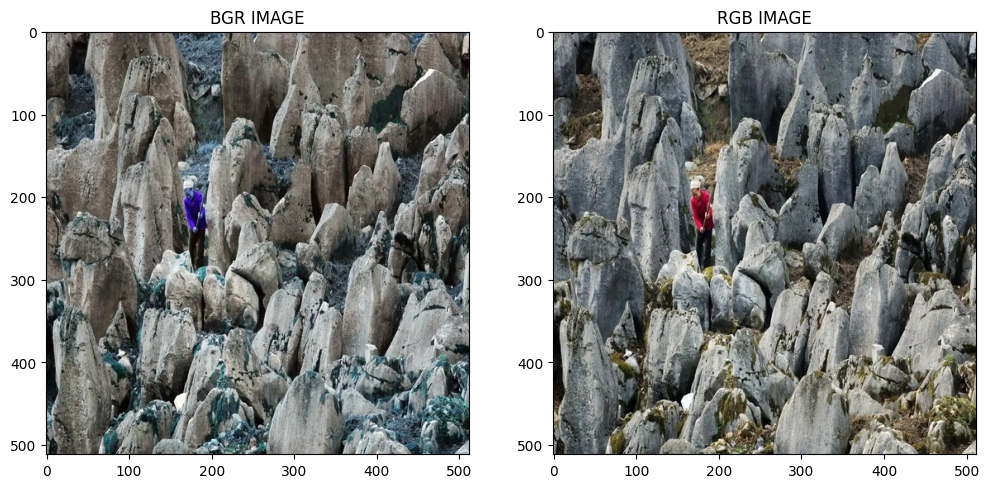

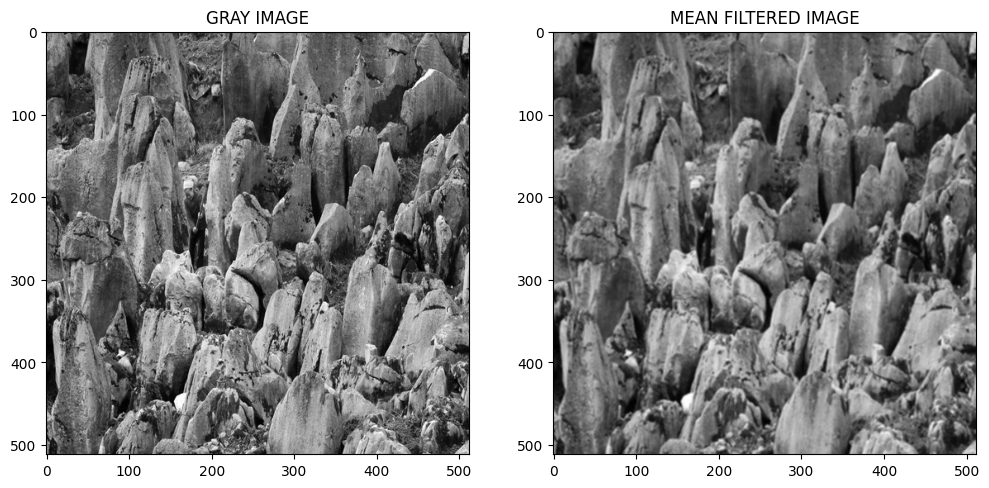

In [3]:
# Load color image in BGR format
img_bgr = cv2.imread("Env_Pack_512x512.jpg")

# Convert BGR -> RGB
img_rgb = img_bgr[:, :, ::-1]

# Convert RGB -> GRAY
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Define 3x3 Mean Kernel
mean_kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
], dtype=np.float32)

# Apply Mean filter to grayscale image

mean_filtered = cv2.filter2D(img_gray, -1, mean_kernel)

cv2.imwrite('Mean_Filtered/bgr_image_MF.jpg', img_bgr)
cv2.imwrite('Mean_Filtered/rgb_image_MF.jpg', img_rgb)
cv2.imwrite('Mean_Filtered/gray_image_MF.jpg', img_gray)
cv2.imwrite('Mean_Filtered/mean_filtered_image_MF.jpg', mean_filtered)

# plot Images
plt.figure(figsize=(12, 9))
plt.subplot(121), plt.imshow(img_bgr), plt.title('BGR IMAGE');
plt.subplot(122), plt.imshow(img_rgb), plt.title('RGB IMAGE');


plt.figure(figsize=(12, 9))
plt.subplot(121), plt.imshow(img_gray, cmap='gray'), plt.title('GRAY IMAGE');
plt.subplot(122), plt.imshow(mean_filtered, cmap='gray'), plt.title('MEAN FILTERED IMAGE');





## **Gaussian Filter**

The Gaussian filter is a linear, low-pass filter widely studied in digital image processing for its ability to smooth images while preserving edges better than simpler filters like the Mean filter. It is based on the Gaussian distribution, which provides a mathematically elegant framework due to its isotropy, separability, and smooth frequency response. In research, the Gaussian filter is a cornerstone for understanding spatial filtering and its frequency domain implications, as highlighted in DIP4e, Chapter 3 (pages 162–164).

From a research perspective, the Gaussian filter is valued for:

- Its ability to balance noise reduction and edge preservation, making it a benchmark for comparing advanced filtering techniques.
- Its frequency domain properties, where it acts as a lowpass filter without the ringing artifacts of ideal filters (DIP4e, page 164).
- Its role in scale-space theory, enabling multi-resolution analysis critical for feature detection and computer vision.

**`GaussianBlur` Buit-in function in python**:
```python
    gaussian_filtered = cv2.GaussianBlur(img_gray, (3, 3), 0)
```

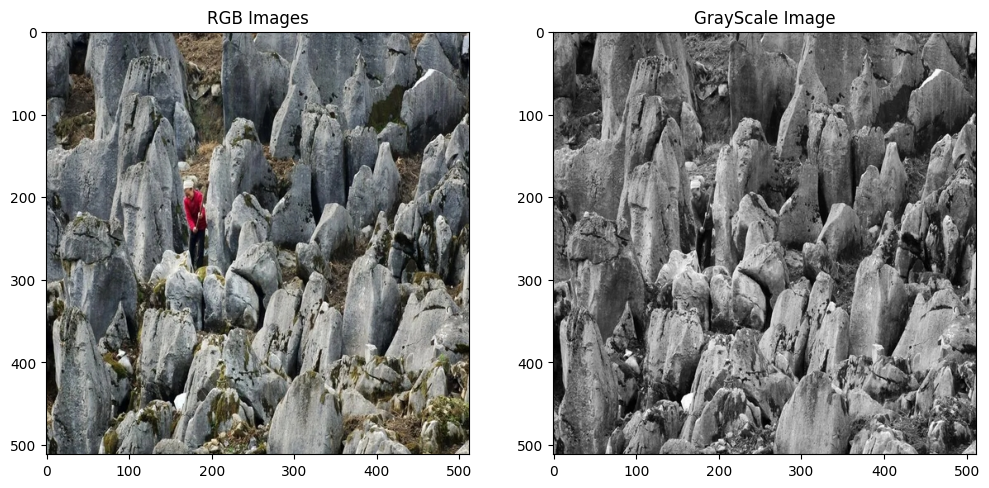

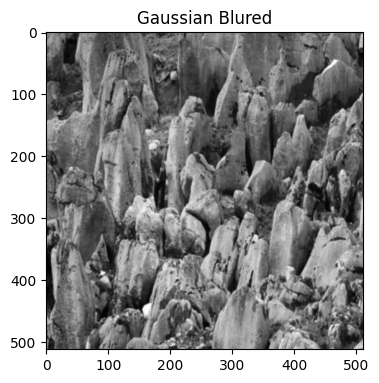

In [4]:
# Read image
img = cv2.imread('Env_Pack_1024x1024.jpg')

# Convert BGR -> RGB
img_rgb = img_bgr[:, :, ::-1]

# Convert RGB -> GRAY
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)



# Define 3x3 Gaussian kernel
gaussian_kernel = np.array([
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]
], dtype=np.float32)

# Apply Gaussian filter
# 'GaussianBlur' is a built-in function in OpenCV
gaussian_filtered = cv2.filter2D(img_gray, -1, gaussian_kernel)

# Save output
cv2.imwrite('Gaussian_Filtered/GRAY_image_GF.jpg', img_gray)
cv2.imwrite('Gaussian_Filtered/gaussian_filtered_GF.jpg', gaussian_filtered)

# plotting images
plt.figure(figsize=(12, 9))
# plt.subplot(121), plt.imshow(img,), plt.title('Original Images');
plt.subplot(121), plt.imshow(img_rgb), plt.title('RGB Images');
plt.subplot(122), plt.imshow(img_gray, cmap='gray'), plt.title('GrayScale Image');

plt.figure(figsize=(9, 9))
plt.subplot(121), plt.imshow(gaussian_filtered, cmap='gray'), plt.title('Gaussian Blured');



## **Median Filter**

The Median Filter is a non-linear spatial domain filter widely used in image processing for noise reduction, particularly effective against impulse noise (e.g., salt-and-pepper noise). Unlike linear filters such as Mean or Gaussian, which compute a weighted average of pixel intensities, the Median Filter replaces each pixel's value with the median of the intensities in a defined neighborhood. This non-linear approach makes it robust for preserving edges and fine details while suppressing noise, a critical requirement in applications like medical imaging, remote sensing, and computer vision.

- **Non-Linearity**: Unlike linear filters, the Median Filter does not obey the superposition principle, making it less amenable to frequency-domain analysis (e.g., Fourier transforms). However, this non-linearity is key to its robustness against outliers.
- **Edge Preservation**: The Median Filter preserves edges better than linear filters because it selects a value already present in the neighborhood, avoiding the averaging that blurs sharp intensity transitions.
- **Order-Statistic Filter**: The Median Filter is a special case of order-statistic filters, where the output is the $ k $-th order statistic of the neighborhood values (for median, $ k = \lfloor n^2/2 \rfloor + 1 $).
- **Idempotence**: Repeated applications of the Median Filter converge to a "root signal" where further filtering produces no change, a property useful in iterative noise reduction.

**`medianblur` is a built-in function in python**:
```python
    median_filtered = cv2.medianBlur(img_gray_MDF, 3)
```

(<Axes: title={'center': 'MEDIAN FILTERED IMAGE'}>,
 Text(0.5, 1.0, 'MEDIAN FILTERED IMAGE'))

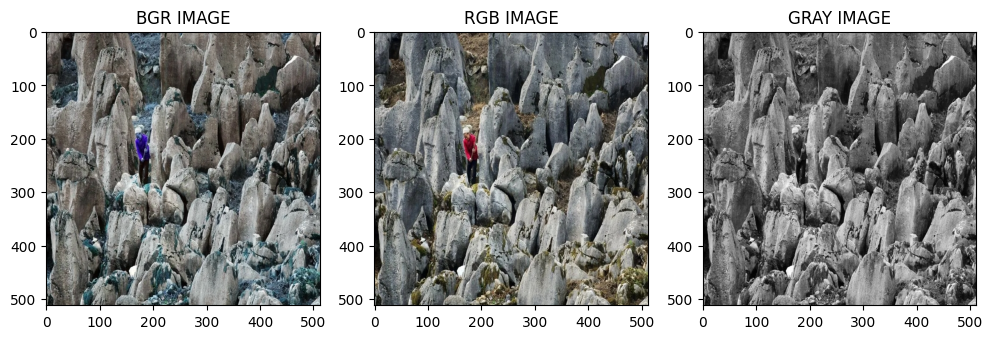

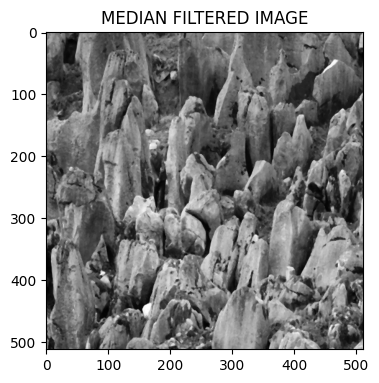

In [5]:
# BGR image
img_bgr_MDF = cv2.imread('Env_Pack_512x512.jpg')

# Converting BGR -> RGB
img_rgb_MDF = img_bgr_MDF[:, :, ::-1]

# Converting RGB -> GRAY
img_gray_MDF = cv2.cvtColor(img_rgb_MDF, cv2.COLOR_RGB2GRAY)

# Defining the median filter manually
# Median filter does not use a kernel like mean or Gaussian filters.

height, width = img_gray_MDF.shape
median_filtered = np.zeros((height, width), dtype=np.uint8)

for i in range(height):
    for j in range(width):
        # Extract 3x3 neighborhood
        neighborhood = img_gray_MDF[max(0, i-1):min(height, i+2), max(0, j-1):min(width, j+2)]
        # Compute median
        median_filtered[i, j] = np.median(neighborhood)

# Save output
cv2.imwrite('Median_Filtered/GRAY_image_MDF.jpg', img_gray_MDF)
cv2.imwrite('Median_Filtered/median_filtered_MDF.jpg', median_filtered)

# Plotting images
plt.figure(figsize=(12, 9))
plt.subplot(131), plt.imshow(img_bgr_MDF), plt.title('BGR IMAGE');
plt.subplot(132), plt.imshow(img_rgb_MDF), plt.title('RGB IMAGE');
plt.subplot(133), plt.imshow(img_gray_MDF, cmap='gray'), plt.title('GRAY IMAGE');

plt.figure(figsize=(9, 9))
plt.subplot(121), plt.imshow(median_filtered, cmap='gray'), plt.title('MEDIAN FILTERED IMAGE')

## **Bilateral Filter**

The Bilateral Filter is a non-linear spatial domain filter introduced by Tomasi and Manduchi in 1998, designed to smooth images while preserving sharp edges. Unlike linear filters (e.g., Mean, Gaussian) that blur edges or non-linear filters like the Median Filter that may remove fine details, the Bilateral Filter combines spatial proximity and intensity similarity to weight neighboring pixels, achieving noise reduction without compromising edge integrity. Its ability to balance smoothing and edge preservation has made it a cornerstone in image processing, computer vision, and computational photography, with applications ranging from denoising to tone mapping.

- **Non-Linearity**: The range weight depends on pixel intensities, making the filter non-linear and resistant to averaging across edges.
- **Edge Preservation**: By down-weighting pixels with large intensity differences, the filter avoids blurring sharp boundaries, unlike Gaussian or Mean filters.
- **Adaptive Kernel**: The effective kernel varies per pixel, adapting to local image content, unlike fixed-kernel linear filters.
- **Separability**: The Bilateral Filter is not separable, requiring full 2D computation, which increases complexity.
- **Frequency Domain**: In the Fourier domain, it approximates a low-pass filter locally but preserves high-frequency edges due to range weighting.
- **Iterative Behavior**: Repeated applications converge to a piecewise-constant image, preserving major edges but potentially over-smoothing textures.

**`cv2.bilateralFilter()` is a built-in python function**:
```python
    bilateral_filtered = cv2.bilateralFilter(img_gray_BF, d=9, sigmaColor=75, sigmaSpace=75)
```

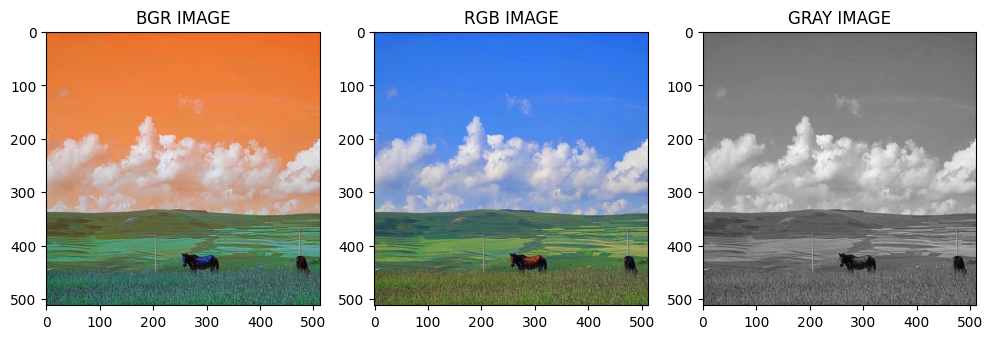

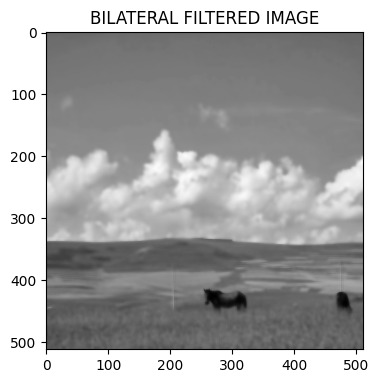

In [6]:
# BGR image
img_bgr_BF = cv2.imread('Env_Pack_512x512(2).jpg')

# Converting BGR -> RGB
img_rgb_BF = img_bgr_BF[:, :, ::-1]

# Converting RGB -> GRAY
img_gray_BF = cv2.cvtColor(img_rgb_BF, cv2.COLOR_RGB2GRAY)

# Apply Bilateral Filter
bilateral_filtered = cv2.bilateralFilter(img_gray_BF, d=9, sigmaColor=75, sigmaSpace=75)

# Save output
cv2.imwrite('Bilateral_Filtered/GRAY_image_BF.jpg', img_gray_BF)
cv2.imwrite('Bilateral_Filtered/bilateral_filtered_BF.jpg', bilateral_filtered)

# Plotting images
plt.figure(figsize=(12, 9))
plt.subplot(131), plt.imshow(img_bgr_BF), plt.title('BGR IMAGE');
plt.subplot(132), plt.imshow(img_rgb_BF), plt.title('RGB IMAGE');
plt.subplot(133), plt.imshow(img_gray_BF, cmap='gray'), plt.title('GRAY IMAGE');

plt.figure(figsize=(9, 9))
plt.subplot(121), plt.imshow(bilateral_filtered, cmap='gray'), plt.title('BILATERAL FILTERED IMAGE');

# **Edge Detection/Sharpening Filters**

## **Laplacian Filter**

The Laplacian filter is a linear, high-pass spatial filter that computes the second derivative of image intensity, highlighting regions with rapid changes (e.g., edges, corners) while suppressing smooth areas. In research, it is valued for its ability to isolate high-frequency components, which correspond to edges and fine details, as discussed in DIP4e, Chapter 3 (pages 162–164). Unlike low-pass filters (e.g., Mean, Gaussian), which smooth noise, the Laplacian amplifies high-frequency content, making it sensitive to both edges and noise.

In the frequency domain (DIP4e, page 164), the Laplacian filter corresponds to a high-pass filter, amplifying high-frequency components (rapid intensity transitions) while attenuating low-frequency components (smooth regions). Its frequency response, derived from the Fourier transform of the Laplacian kernel, enhances edge-related frequencies, contrasting with the lowpass filters discussed in DIP4e (e.g., Figure 3.32(a)).

Research studies the Laplacian filter for:

- Its role in edge detection and image sharpening, serving as a baseline for advanced algorithms.
- Its sensitivity to noise, prompting hybrid approaches with preprocessing filters.
- Its integration into multi-scale frameworks, such as Laplacian pyramids, for hierarchical image analysis.

**`cv2.Laplacian()` is a built-in python function**:
```python
    laplace = cv2.Laplacian(img_gray_LF, cv2.CV_64F)
```

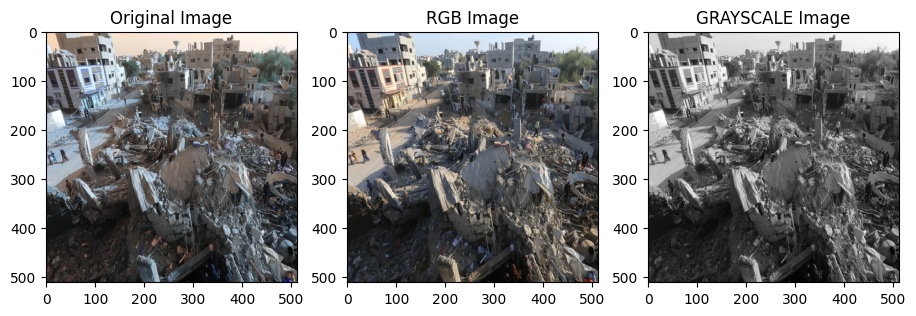

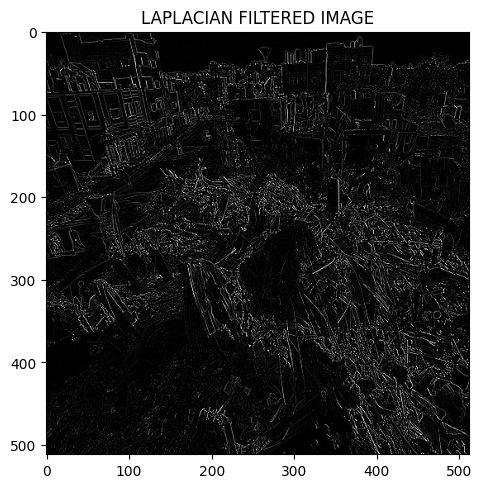

In [7]:
img_LF = cv2.imread('Env_Pack_512x512(1).jpg')

img_rgb_LF = img_LF[:, :, ::-1]

# Convert RGB -> GRAY
img_gray_LF = cv2.cvtColor(img_rgb_LF, cv2.COLOR_RGB2GRAY)
# Define 3x3 Laplacian kernel
laplacian_kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

# Apply Laplacian filter
laplacian_filtered = cv2.filter2D(img_gray_LF, -1, laplacian_kernel)

# Enhance edges by adding Laplacian to original (scaled)
laplacian_enhanced = cv2.addWeighted(img_gray_LF, 1, laplacian_filtered, 0.5, 0)

# Save output
cv2.imwrite('Laplacian_Filtered/grayscale_LF.jpg', img_gray_LF)
cv2.imwrite('Laplacian_Filtered/laplacian_enhanced.jpg', laplacian_enhanced)

# Plotting images
plt.figure(figsize=(11, 9))
plt.subplot(131), plt.imshow(img_LF), plt.title('Original Image');
plt.subplot(132), plt.imshow(img_rgb_LF), plt.title('RGB Image');
plt.subplot(133), plt.imshow(img_gray_LF, cmap='gray'), plt.title('GRAYSCALE Image');

plt.figure(figsize=(12, 9))
plt.subplot(121), plt.imshow(laplacian_filtered, cmap='gray'), plt.title('LAPLACIAN FILTERED IMAGE');


## **Sobel Filter**

The Sobel Filter, also known as the Sobel Operator, is a first-order derivative-based edge detection filter widely used in digital image processing and computer vision. Introduced by Irwin Sobel and Gary Feldman in the late 1960s, it is designed to detect edges by computing the gradient of image intensity, highlighting regions of significant intensity change. The Sobel Filter is prized for its simplicity, computational efficiency, and ability to approximate gradients in both horizontal and vertical directions, making it a foundational tool in applications such as object detection, image segmentation, and feature extraction.

- **First-Order Derivative**: The Sobel Filter approximates the first partial derivatives, making it sensitive to intensity transitions (edges) but less precise for edge localization compared to second-order methods (e.g., Laplacian).
- **Noise Suppression**: The 3x3 kernel’s weighted structure (central pixels weighted twice) provides some averaging, reducing sensitivity to high-frequency noise compared to simpler operators like Roberts.
- **Separability**: The Sobel kernels are not separable, requiring full 2D convolution, unlike Gaussian filters.
- **Orthogonal Gradients**: The use of two kernels allows independent estimation of horizontal and vertical intensity changes, enabling comprehensive edge detection.
- **Frequency Domain**: In the Fourier domain, the Sobel Filter acts as a high-pass filter, emphasizing high-frequency components (edges) while attenuating low-frequency (smooth) regions.

**`cv2.Sobel()` is a built-in function in python**:
```python
    sobel = cv2.Sobel(img_gray_SF, cv2.CV_64F, 1, 1, ksize=3)
```

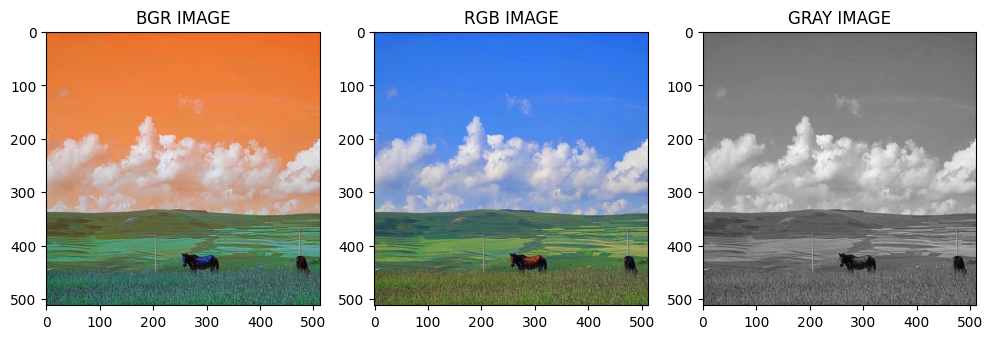

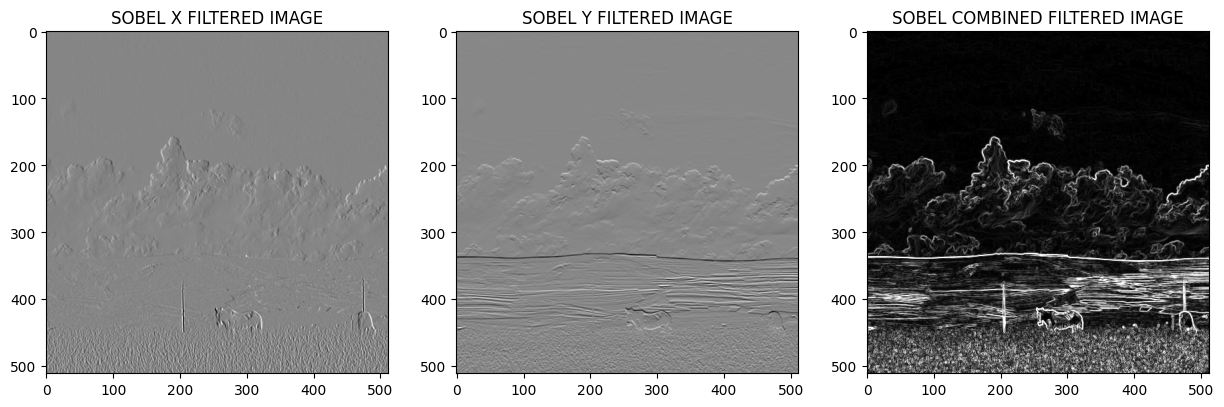

In [8]:
img_bgr_SF = cv2.imread('Env_Pack_512x512(2).jpg')

# Convert BGR -> RGB
img_rgb_SF = img_bgr_SF[:, :, ::-1] 

# Convert RGB -> GRAY
img_gray_SF = cv2.cvtColor(img_rgb_SF, cv2.COLOR_RGB2GRAY)

# Define 3x3 Sobel kernels
sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]], dtype=np.float32)
sobel_y_kernel = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]], dtype=np.float32)

# Apply Sobel filters
sobel_x = cv2.filter2D(img_gray_SF, cv2.CV_64F, sobel_x_kernel)
sobel_y = cv2.filter2D(img_gray_SF, cv2.CV_64F, sobel_y_kernel)
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

# Save output
cv2.imwrite('Sobel_Filtered/sobel_x.jpg', sobel_x)
cv2.imwrite('Sobel_Filtered/sobel_y.jpg', sobel_y)
cv2.imwrite('Sobel_Filtered/sobel_combined.jpg', sobel_combined)

# Plotting images
plt.figure(figsize=(12, 9))
plt.subplot(131), plt.imshow(img_bgr_SF), plt.title('BGR IMAGE')
plt.subplot(132), plt.imshow(img_rgb_SF), plt.title('RGB IMAGE');
plt.subplot(133), plt.imshow(img_gray_SF, cmap='gray'), plt.title('GRAY IMAGE');

plt.figure(figsize=(15, 6))
plt.subplot(131), plt.imshow(sobel_x, cmap='gray'), plt.title('SOBEL X FILTERED IMAGE')
plt.subplot(132), plt.imshow(sobel_y, cmap='gray'), plt.title('SOBEL Y FILTERED IMAGE')
plt.subplot(133), plt.imshow(sobel_combined, cmap='gray'), plt.title('SOBEL COMBINED FILTERED IMAGE'); 

## **Prewitt Filter**

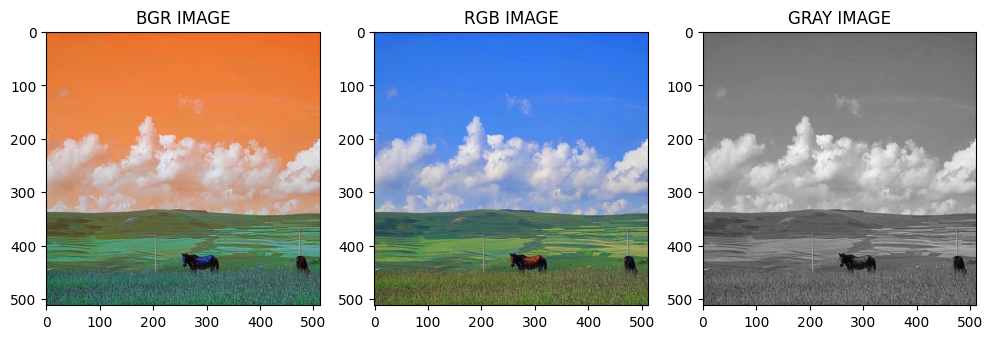

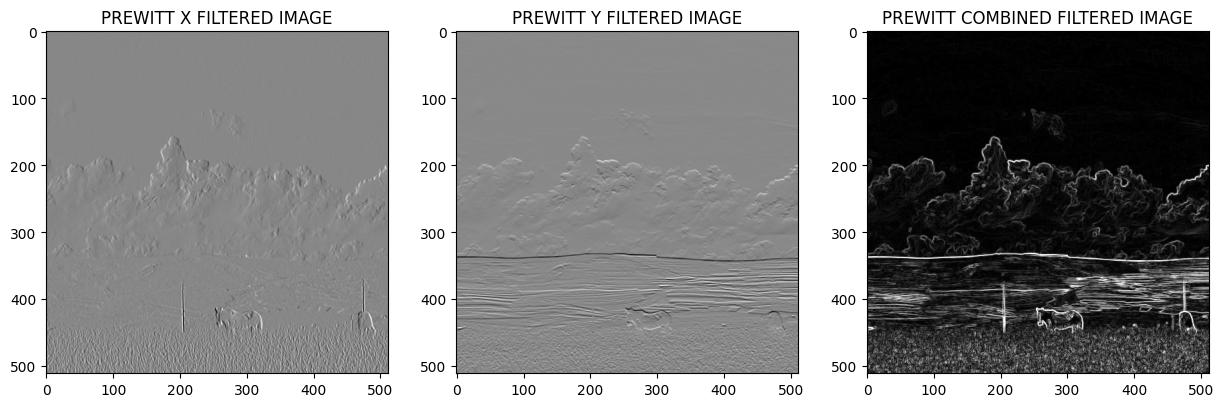

In [9]:
# BGR Image
img_bgr_PF =  cv2.imread('Env_Pack_512x512(2).jpg')

# Convert BGR -> RGB
img_rgb_PF = img_bgr_PF[:, :, ::-1]

# Convert RGB -> GRAY
img_gray_PF = cv2.cvtColor(img_rgb_PF, cv2.COLOR_RGB2GRAY)

# Define Prewitt kernels
prewitt_x_kernel = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]], dtype=np.float32)
prewitt_y_kernel = np.array([[-1, -1, -1],
                             [0, 0, 0],
                             [1, 1, 1]], dtype=np.float32)

# Apply Prewitt filters
prewitt_x = cv2.filter2D(img_gray_PF, cv2.CV_64F, prewitt_x_kernel)
prewitt_y = cv2.filter2D(img_gray_PF, cv2.CV_64F, prewitt_y_kernel)
prewitt_combined = np.sqrt(prewitt_x**2 + prewitt_y**2)
prewitt_combined = np.uint8(np.clip(prewitt_combined, 0, 255))

# Save output
cv2.imwrite('Prewitt_Filtered/prewitt_x.jpg', prewitt_x)
cv2.imwrite('Prewitt_Filtered/prewitt_y.jpg', prewitt_y)
cv2.imwrite('Prewitt_Filtered/prewitt_combined.jpg', prewitt_combined)

# Plotting images
plt.figure(figsize=(12, 9))
plt.subplot(131), plt.imshow(img_bgr_PF), plt.title('BGR IMAGE');
plt.subplot(132), plt.imshow(img_rgb_PF), plt.title('RGB IMAGE');
plt.subplot(133), plt.imshow(img_gray_PF, cmap='gray'), plt.title('GRAY IMAGE');

plt.figure(figsize=(15, 6))
plt.subplot(131), plt.imshow(prewitt_x, cmap='gray'), plt.title('PREWITT X FILTERED IMAGE');
plt.subplot(132), plt.imshow(prewitt_y, cmap='gray'), plt.title('PREWITT Y FILTERED IMAGE');
plt.subplot(133), plt.imshow(prewitt_combined, cmap='gray'), plt.title('PREWITT COMBINED FILTERED IMAGE');


## **Laplacian of Gaussian (LoG) Filter**

The Laplacian of Gaussian (LoG) Filter, also known as the Marr-Hildreth edge detector, is a second-order derivative-based method for edge detection in digital image processing. Introduced by David Marr and Ellen Hildreth in 1980, it combines Gaussian smoothing to reduce noise sensitivity with the Laplacian operator to detect regions of rapid intensity change (edges) via zero-crossings. The LoG Filter is particularly valued for its ability to localize edges accurately in noisy images, making it a foundational tool in computer vision, medical imaging, and feature extraction.

- **Second-Order Derivative**: The LoG Filter detects edges by identifying zero-crossings in the second derivative, offering precise edge localization compared to first-order methods (e.g., Sobel).
- **Scale-Space Representation**: The Gaussian smoothing introduces a scale parameter ($ \sigma $), enabling multi-scale edge detection within the scale-space framework.
- **Noise Suppression**: The Gaussian component reduces high-frequency noise, making LoG more robust than the plain Laplacian.
- **Isotropy**: The LoG kernel is rotationally symmetric, detecting edges regardless of orientation.
- **Non-Linearity in Post-Processing**: Zero-crossing detection is a non-linear operation, complicating frequency-domain analysis but enabling precise edge mapping.
- **Mexican Hat Wavelet**: The LoG function resembles a wavelet, linking it to wavelet-based edge detection methods.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Axes: title={'center': 'LoG FILTERED IMAGE'}>,
 Text(0.5, 1.0, 'LoG FILTERED IMAGE'))

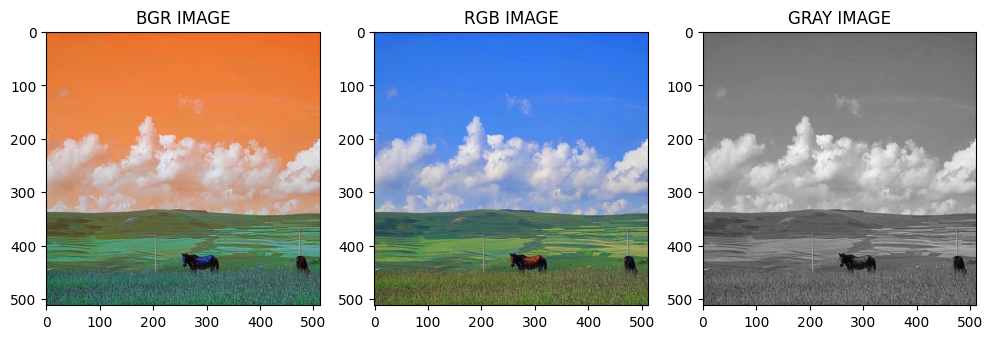

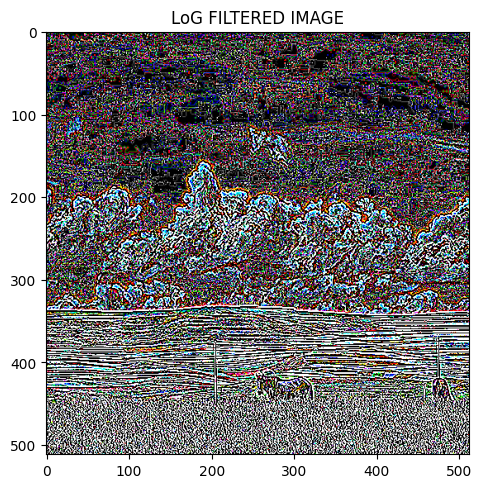

In [16]:
# BGR Image
img_bgr_log = cv2.imread('Env_Pack_512x512(2).jpg')

# Convert BGR -> RGB
img_rgb_log = img_bgr_log[:, :, ::-1]

# Convert RGB -> GRAY
img_gray_log = cv2.cvtColor(img_rgb_log, cv2.COLOR_RGB2GRAY)

# Define Laplacian of Gaussian kernel
# Define 5x5 LoG kernel (approximated, sigma=1)
log_kernel = np.array([[0,  0, -1,  0,  0],
                       [0, -1, -2, -1,  0],
                       [-1, -2, 16, -2, -1],
                       [0, -1, -2, -1,  0],
                       [0,  0, -1,  0,  0]], dtype=np.float32) / 16

# Apply LoG filter
log_filtered = cv2.filter2D(img_bgr_log, cv2.CV_64F, log_kernel)

# Simple zero-crossing detection (threshold-based for visualization)
log_edges = np.zeros_like(log_filtered)
log_edges[np.abs(log_filtered) < 0.5] = 0  # Threshold near zero
log_edges = np.uint8(np.clip(log_edges, 0, 255))

# Save output
cv2.imwrite('LoG_Filtered/grayscale_log.jpg', img_gray_log)
cv2.imwrite('LoG_Filtered/log_filtered.jpg', log_filtered)
cv2.imwrite('LoG_Filtered/log_edges.jpg', log_edges)

# Plotting images
plt.figure(figsize=(12, 9))
plt.subplot(131), plt.imshow(img_bgr_log), plt.title('BGR IMAGE');
plt.subplot(132), plt.imshow(img_rgb_log), plt.title('RGB IMAGE');
plt.subplot(133), plt.imshow(img_gray_log, cmap='gray'), plt.title('GRAY IMAGE');

plt.figure(figsize=(12, 9))
plt.subplot(121), plt.imshow(log_filtered, cmap='gray'), plt.title('LoG FILTERED IMAGE')





## **Canny Edge Detector**

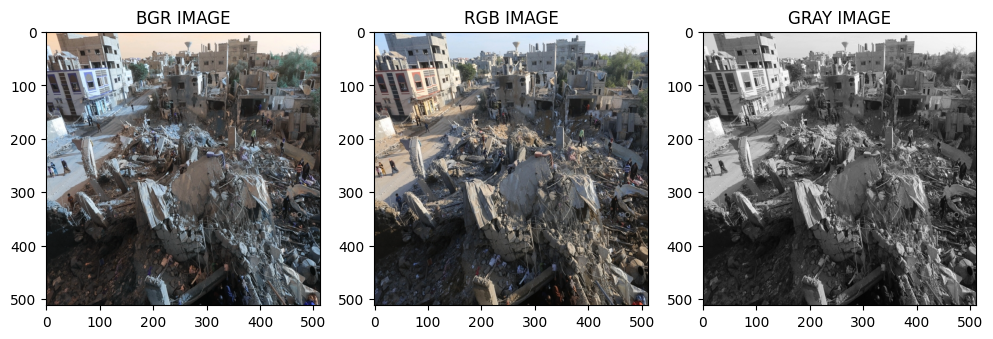

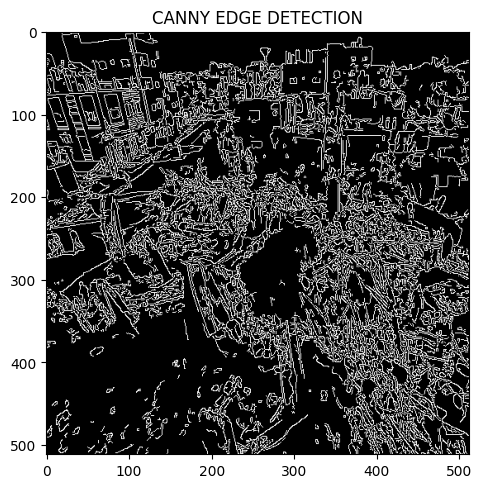

In [17]:
# BGR Image for Canny Edge Detection
img_bgr_CED = cv2.imread('Env_Pack_512x512(1).jpg')

# Convert BGR -> RGB
img_rgb_CED = img_bgr_CED[:, :, ::-1]

# Convert RGB -> GRAY
img_gray_CED = cv2.cvtColor(img_rgb_CED, cv2.COLOR_RGB2GRAY)

# Apply Canny Edge Detection
canny_edges = cv2.Canny(img_gray_CED, threshold1=100, threshold2=200)

# Save output
cv2.imwrite('Canny_Edge_Detection/gray_image_CED.jpg', img_gray_CED)
cv2.imwrite('Canny_Edge_Detection/canny_edges_CED.jpg', canny_edges)

# Plotting images
plt.figure(figsize=(12, 9))
plt.subplot(131), plt.imshow(img_bgr_CED), plt.title('BGR IMAGE');
plt.subplot(132), plt.imshow(img_rgb_CED), plt.title('RGB IMAGE');
plt.subplot(133), plt.imshow(img_gray_CED, cmap='gray'), plt.title('GRAY IMAGE');

plt.figure(figsize=(12, 9))
plt.subplot(121), plt.imshow(canny_edges, cmap='gray'), plt.title('CANNY EDGE DETECTION');


## References

[1] R. C. Gonzalez and R. E. Woods, Digital Image Processing, 4th ed. Pearson, 2018.

[2] T. S. Huang, G. J. Yang, and G. Y. Tang, “A fast two-dimensional median filtering algorithm,” IEEE Transactions on Acoustics, Speech, and Signal Processing, vol. 27, no. 1, pp.
13–18, Feb. 1979.

[3] C. Tomasi and R. Manduchi, “Bilateral filtering for gray and color images,” in Proc. IEEE
International Conference on Computer Vision (ICCV), 1998, pp. 839–846.

[4] D. Marr and E. Hildreth, “Theory of edge detection,” Proceedings of the Royal Society of
London. Series B, Biological Sciences, vol. 207, no. 1167, pp. 187–217, Feb. 1980.

[5] J. Canny, “A computational approach to edge detection,” IEEE Transactions on Pattern
Analysis and Machine Intelligence, vol. PAMI-8, no. 6, pp. 679–698, Nov. 1986.

[6] S. Paris and F. Durand, “A fast approximation of the bilateral filter using a signal processing
approach,” in Proc. European Conference on Computer Vision (ECCV), 2006, pp. 568–580.

[7] Y. Liu, M.-M. Cheng, X. Hu, J.-W. Bian, L. Zhang, X. Bai, and J. Tang, “Richer convolutional features for edge detection,” IEEE Transactions on Pattern Analysis and Machine
Intelligence, vol. 41, no. 8, pp. 1939–1946, Aug. 2019.